# Evaluating photonic circuits using the permanent method and tensor networks

By representing the circuits in $\bf{ZW}_\infty$, we can treat them as a tensor networks which can be contracted using different methods. Here, we simply use the tensor class from DisCoPy, but tools such as Quimb could be used. 

In [8]:
import sys
sys.path.append('..')

from optyx import circuit
from optyx import qpath
from optyx import zw
import numpy as np

## Hong-Ou-Mandel effect

We can define the optical circuit to represent the Hong-Ou-Mandel effect in QPath, then translate the circuit to $\bf{ZW}_\infty$:

In [88]:
hom = qpath.Create(1, 1) >> circuit.BBS(0) >> qpath.Select(1, 1)

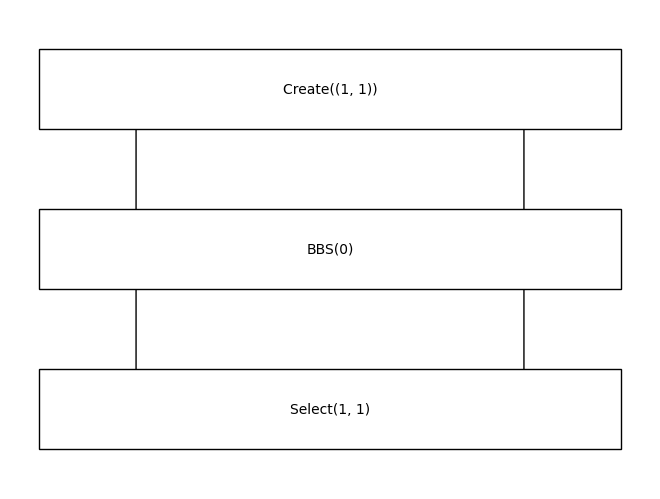

In [91]:
hom.draw()

Convert the QPath diagram to a $\bf{ZW}_\infty$ diagram:

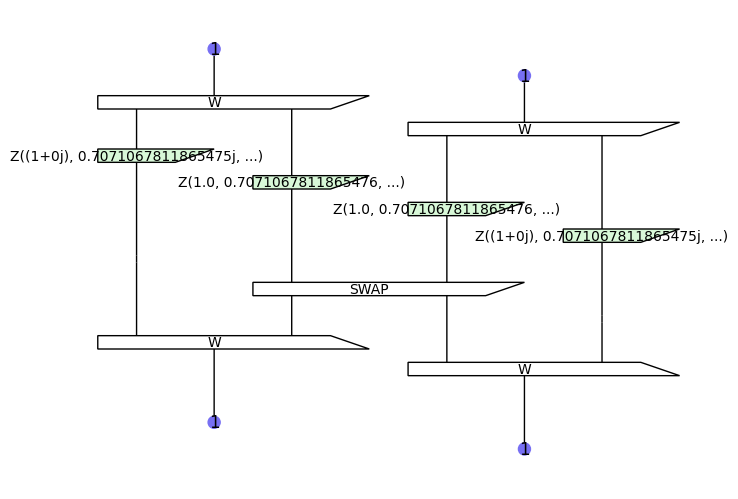

In [93]:
hom.to_zw().draw()

Evaluating the permanent:

In [100]:
hom.to_path().prob_with_perceval().array

[warning] Unable to normalize a distribution with only null probabilities
[warning] Unable to normalize a distribution with only null probabilities


array([[0.+0.j]])

In [102]:
hom.to_path().prob().array

array([[4.93038066e-32+0.j]])

Evaluating the tensor network:

In [101]:
hom.to_zw().to_tensor().eval().array

array(2.22044605e-16+0.j)

# Number operator

In [114]:
number_operator = (qpath.Split() >> 
                   qpath.Select(1) @ qpath.Id(1) >> 
                   qpath.Create(1) @ qpath.Id(1) >> 
                   qpath.Merge())

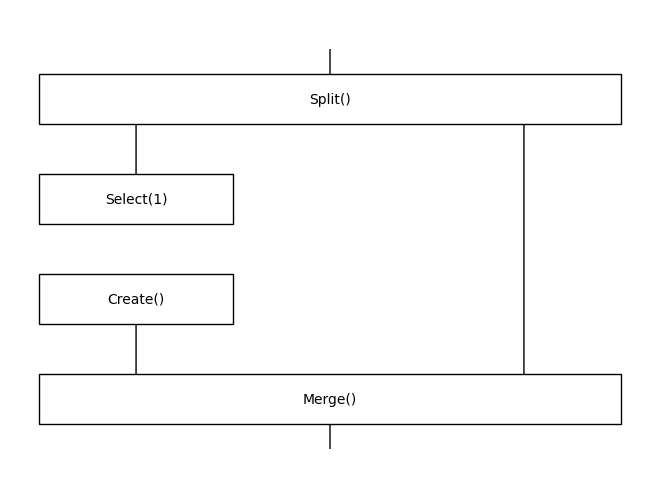

In [115]:
number_operator.draw()

In [122]:
# Create a 2-photon state
two_p = qpath.Create(2) >> number_operator >> qpath.Select(2)
np.sqrt(two_p.prob().array)

array([[2.+0.j]])

In [123]:
two_p.to_zw().to_tensor().eval().array 

array(2.+0.j)

In [124]:
# Create a 3-photon state
three_p = qpath.Create(3) >> number_operator >> qpath.Select(3)
np.sqrt(three_p.prob().array)

array([[3.+0.j]])

In [125]:
three_p.to_zw().to_tensor().eval().array 

array(3.+0.j)

In [127]:
# Create a 12-photon state
n_p = qpath.Create(12) >> number_operator >> qpath.Select(12)
np.sqrt(n_p.prob().array)

array([[12.+0.j]])

In [128]:
n_p.to_zw().to_tensor().eval().array 

array(12.+0.j)

## More complicated circuit

In [5]:
circ = (
    qpath.Create(1, 1, 1, 1) >> 
    circuit.BBS(0.3) @ circuit.MZI(0.34, 0.10) >>
    circuit.Phase(np.pi/2) @ qpath.Id(1) @ qpath.Id(1) @ circuit.Phase(np.pi/4)
)

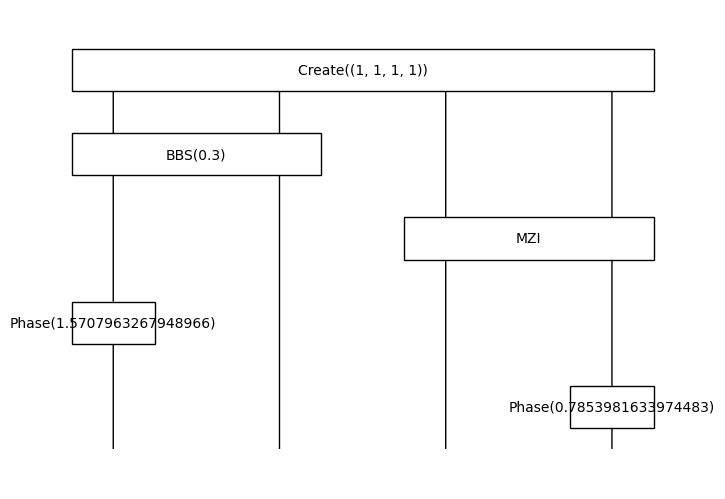

In [6]:
circ.draw()

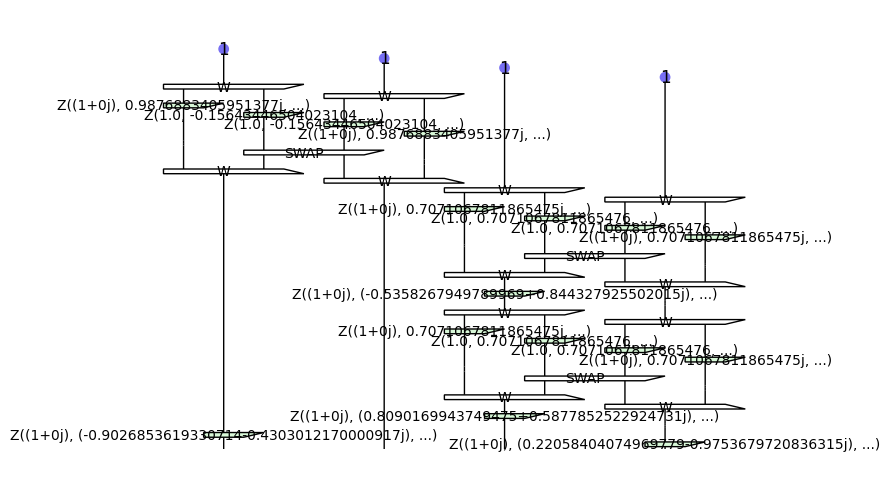

In [7]:
circ.to_zw().draw()

In [10]:
diagram_qpath = circ
diagram_zw = diagram_qpath.to_zw()

prob_zw_ = np.abs(diagram_zw.to_tensor().eval().array).flatten() ** 2
prob_zw = zw.tn_output_2_perceval_output(prob_zw_, diagram_zw)

prob_perceval = diagram_qpath.to_path().prob_with_perceval().array
prob_eval = diagram_qpath.to_path().prob().array

assert np.allclose(prob_zw, prob_perceval)